# Proyek Belajar Machine Learning untuk Pemula : Survei Kepuasan Pelanggan

- **Nama:** Eva Meivina Dwiana
- **Email:** evameivina@gmail.com
- **ID Dicoding:** evameivina - MC009D5X0328

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import pustaka yang dibutuhkan
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
import seaborn as sns  # Untuk visualisasi
import matplotlib.pyplot as plt  # Untuk visualisasi grafik
import math

# Import pustaka Machine Learning
from sklearn.model_selection import train_test_split  # Membagi dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  # Scaling & Encoding
from sklearn.cluster import KMeans, DBSCAN  # Algoritma Clustering
from sklearn.metrics import silhouette_score, accuracy_score  # Evaluasi model
from sklearn.linear_model import LinearRegression, LogisticRegression  # Model regresi
from sklearn.tree import DecisionTreeClassifier  # Model Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Model Random Forest
from sklearn.decomposition import PCA  # Untuk Principal Component Analysis (PCA)
from yellowbrick.cluster import KElbowVisualizer  # Visualisasi metode Elbow

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Untuk membaca dataset dari sumber online dengan pemisah titik koma
url = 'https://raw.githubusercontent.com/Evameivina/machinelearning/refs/heads/main/Submission/bike_buyers_ml.csv'
bike_buyers_ml_df = pd.read_csv(url, sep=';')

In [3]:
# Untuk menghapus spasi ekstra di nama kolom
bike_buyers_ml_df.columns = bike_buyers_ml_df.columns.str.strip()

In [4]:
# Untuk menampilkan 5 baris pertama
print(bike_buyers_ml_df.head())

      ID Marital Status Gender  Income  Children        Education  \
0  12496              M      F    40.0         1        Bachelors   
1  24107              M      M    30.0         3  Partial College   
2  14177              M      M    80.0         5  Partial College   
3  24381              S      M    70.0         0        Bachelors   
4  25597              S      M    30.0         0        Bachelors   

       Occupation Home Owner  Cars Commute Distance   Region  Age  
0  Skilled Manual        Yes     0        0-1 Miles   Europe   42  
1        Clerical        Yes     1        0-1 Miles   Europe   43  
2    Professional         No     2        2-5 Miles   Europe   60  
3    Professional        Yes     1       5-10 Miles  Pacific   41  
4        Clerical         No     0        0-1 Miles   Europe   36  


In [5]:
# Untuk melihat informasi umum dataset
bike_buyers_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1026 non-null   int64  
 1   Marital Status    1026 non-null   object 
 2   Gender            1026 non-null   object 
 3   Income            1026 non-null   float64
 4   Children          1026 non-null   int64  
 5   Education         1026 non-null   object 
 6   Occupation        1026 non-null   object 
 7   Home Owner        1026 non-null   object 
 8   Cars              1026 non-null   int64  
 9   Commute Distance  1026 non-null   object 
 10  Region            1026 non-null   object 
 11  Age               1026 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 96.3+ KB


In [6]:
# Untuk mengecek jumlah nilai yang hilang
print("\nJumlah Missing Values per Kolom:\n", bike_buyers_ml_df.isnull().sum())


Jumlah Missing Values per Kolom:
 ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
dtype: int64


In [7]:
# Untuk menampilkan statistik deskriptif
print("\nStatistik Data:\n", bike_buyers_ml_df.describe())


Statistik Data:
                  ID       Income     Children         Cars          Age
count   1026.000000  1026.000000  1026.000000  1026.000000  1026.000000
mean   19969.196881    56.208577     1.892788     1.437622    44.138402
std     5332.672942    31.293284     1.626670     1.125538    11.349282
min    11000.000000    10.000000     0.000000     0.000000    25.000000
25%    15304.750000    30.000000     0.000000     1.000000    35.000000
50%    19744.000000    60.000000     2.000000     1.000000    43.000000
75%    24457.750000    70.000000     3.000000     2.000000    52.000000
max    29447.000000   170.000000     5.000000     4.000000    89.000000


In [8]:
# Untuk mengecek dan menghapus duplikasi
print(f"Jumlah duplikasi sebelum dihapus: {bike_buyers_ml_df.duplicated().sum()}")

bike_buyers_ml_df.drop_duplicates(inplace=True)

print(f"Jumlah duplikasi setelah dihapus: {bike_buyers_ml_df.duplicated().sum()}")

Jumlah duplikasi sebelum dihapus: 26
Jumlah duplikasi setelah dihapus: 0


In [9]:
# Untuk menampilkan jumlah nilai unik per kolom
print("\nJumlah Nilai Unik per Kolom:\n", bike_buyers_ml_df.nunique())


Jumlah Nilai Unik per Kolom:
 ID                  1000
Marital Status         2
Gender                 2
Income                16
Children               6
Education              5
Occupation             5
Home Owner             2
Cars                   5
Commute Distance       5
Region                 3
Age                   53
dtype: int64


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Memahami Struktur Data

In [10]:
# Untuk mengecek jumlah baris dan kolom dalam dataset
print(bike_buyers_ml_df.shape)

(1000, 12)


In [11]:
# Untuk mengecek jenis data di setiap kolom
print(bike_buyers_ml_df.dtypes)

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children              int64
Education            object
Occupation           object
Home Owner           object
Cars                  int64
Commute Distance     object
Region               object
Age                   int64
dtype: object


## Menangani Data yang Hilang

In [12]:
# Untuk mengecek jumlah data yang hilang (missing values) di setiap kolom
print(bike_buyers_ml_df.isna().sum())

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
dtype: int64


## Analisis Distribusi dan Korelasi

In [13]:
# Statistika deskriptif untuk variabel numerik
print(bike_buyers_ml_df.describe())

                 ID       Income     Children         Cars          Age
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean   19965.992000    56.360000     1.898000     1.442000    44.163000
std     5347.333948    31.085635     1.628572     1.125123    11.364488
min    11000.000000    10.000000     0.000000     0.000000    25.000000
25%    15290.750000    30.000000     0.000000     1.000000    35.000000
50%    19744.000000    60.000000     2.000000     1.000000    43.000000
75%    24470.750000    70.000000     3.000000     2.000000    52.000000
max    29447.000000   170.000000     5.000000     4.000000    89.000000


In [14]:
# Untuk mengecek nama kolom agar tidak ada spasi yang tersembunyi
print(bike_buyers_ml_df.columns)

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region',
       'Age'],
      dtype='object')


In [15]:
# Menghapus spasi di nama kolom
bike_buyers_ml_df.columns = bike_buyers_ml_df.columns.str.strip()
print(bike_buyers_ml_df.columns)

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region',
       'Age'],
      dtype='object')


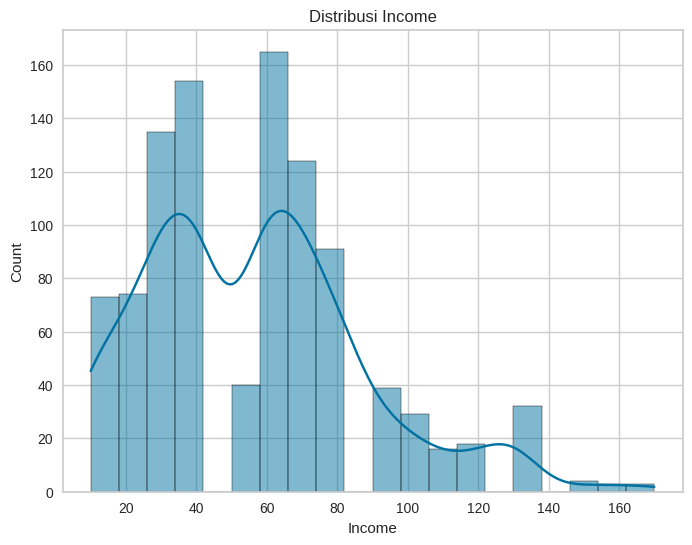

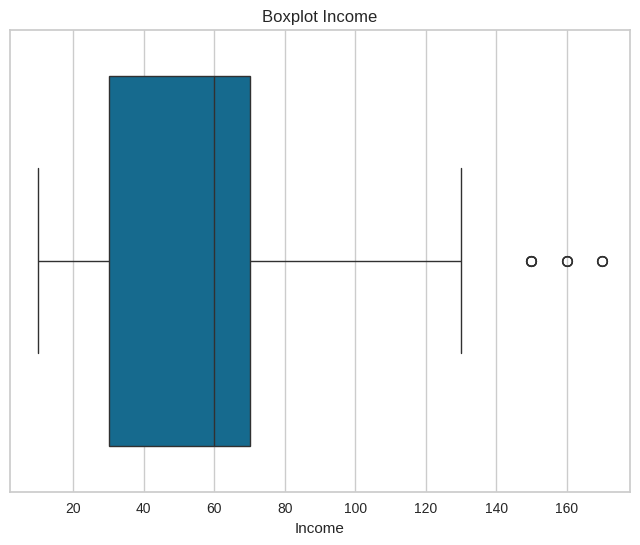

In [16]:
# Visualisasi distribusi variabel numerik
plt.figure(figsize=(8, 6))
sns.histplot(bike_buyers_ml_df['Income'], kde=True)
plt.title('Distribusi Income')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=bike_buyers_ml_df['Income'])
plt.title('Boxplot Income')
plt.show()

In [17]:
# Menghitung IQR untuk menentukan outlier
Q1 = bike_buyers_ml_df['Income'].quantile(0.25)
Q3 = bike_buyers_ml_df['Income'].quantile(0.75)
IQR = Q3 - Q1

In [18]:
# Menentukan batas bawah dan atas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
# Mendeteksi outlier berdasarkan batas bawah dan atas
outliers = bike_buyers_ml_df[(bike_buyers_ml_df['Income'] < lower_bound) | (bike_buyers_ml_df['Income'] > upper_bound)]
print(outliers)

        ID Marital Status Gender  Income  Children        Education  \
6    27974              S      M   160.0         2      High School   
12   11434              M      M   170.0         5  Partial College   
43   17185              M      F   170.0         4  Partial College   
121  15922              M      M   150.0         2      High School   
178  14191              M      M   160.0         4  Partial College   
259  12705              M      M   150.0         0        Bachelors   
321  16675              S      F   160.0         0  Graduate Degree   
356  23608              M      F   150.0         3      High School   
829  16009              S      M   170.0         1  Graduate Degree   
993  11292              S      M   150.0         1  Partial College   

       Occupation Home Owner  Cars Commute Distance         Region  Age  
6      Management        Yes     4        0-1 Miles        Pacific   33  
12   Professional        Yes     0        0-1 Miles         Europe   5

## Encoding Data Kategorikal

In [20]:
# Membuat salinan dataset agar tidak mengubah data asli
bike_buyers_ml_df_encoded = bike_buyers_ml_df.copy()

In [21]:
# Loop untuk encoding semua kolom kategorikal
for col in bike_buyers_ml_df_encoded.select_dtypes(include=['object']).columns:
    bike_buyers_ml_df_encoded[col] = LabelEncoder().fit_transform(bike_buyers_ml_df_encoded[col])

In [22]:
# Mengecek apakah encoding berhasil
print(bike_buyers_ml_df_encoded.head())

      ID  Marital Status  Gender  Income  Children  Education  Occupation  \
0  12496               0       0    40.0         1          0           4   
1  24107               0       1    30.0         3          3           0   
2  14177               0       1    80.0         5          3           3   
3  24381               1       1    70.0         0          0           3   
4  25597               1       1    30.0         0          0           0   

   Home Owner  Cars  Commute Distance  Region  Age  
0           1     0                 0       0   42  
1           1     1                 0       0   43  
2           0     2                 3       0   60  
3           1     1                 4       2   41  
4           0     0                 0       0   36  


## Matriks korelasi

In [23]:
# Membuat matriks korelasi untuk melihat hubungan antar variabel
corr_matrix = bike_buyers_ml_df_encoded.corr()

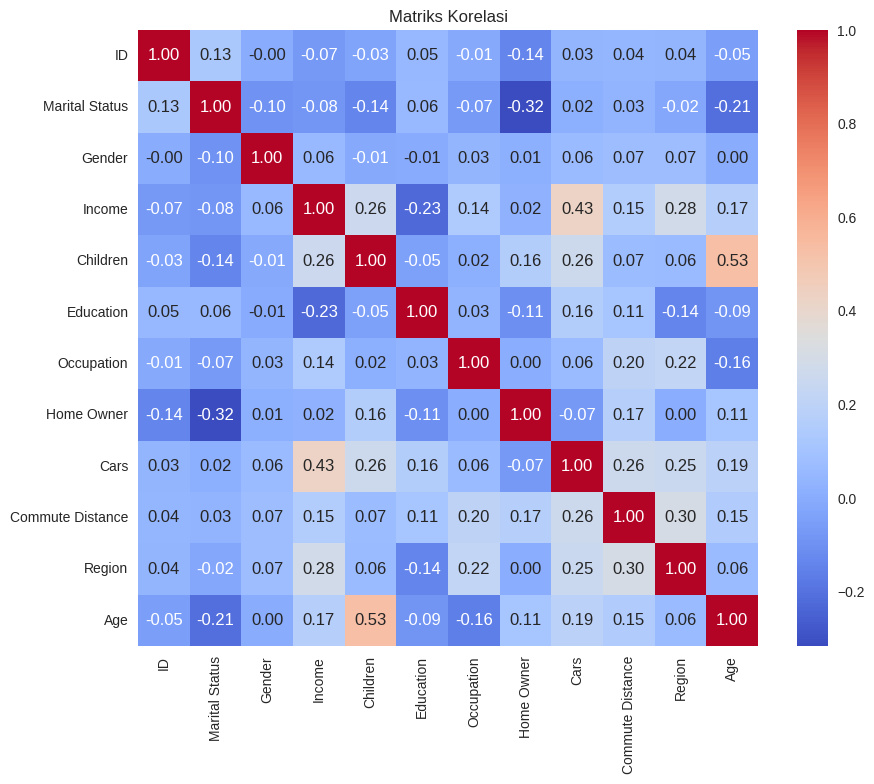

In [24]:
# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

## Visualisasi distribusi data

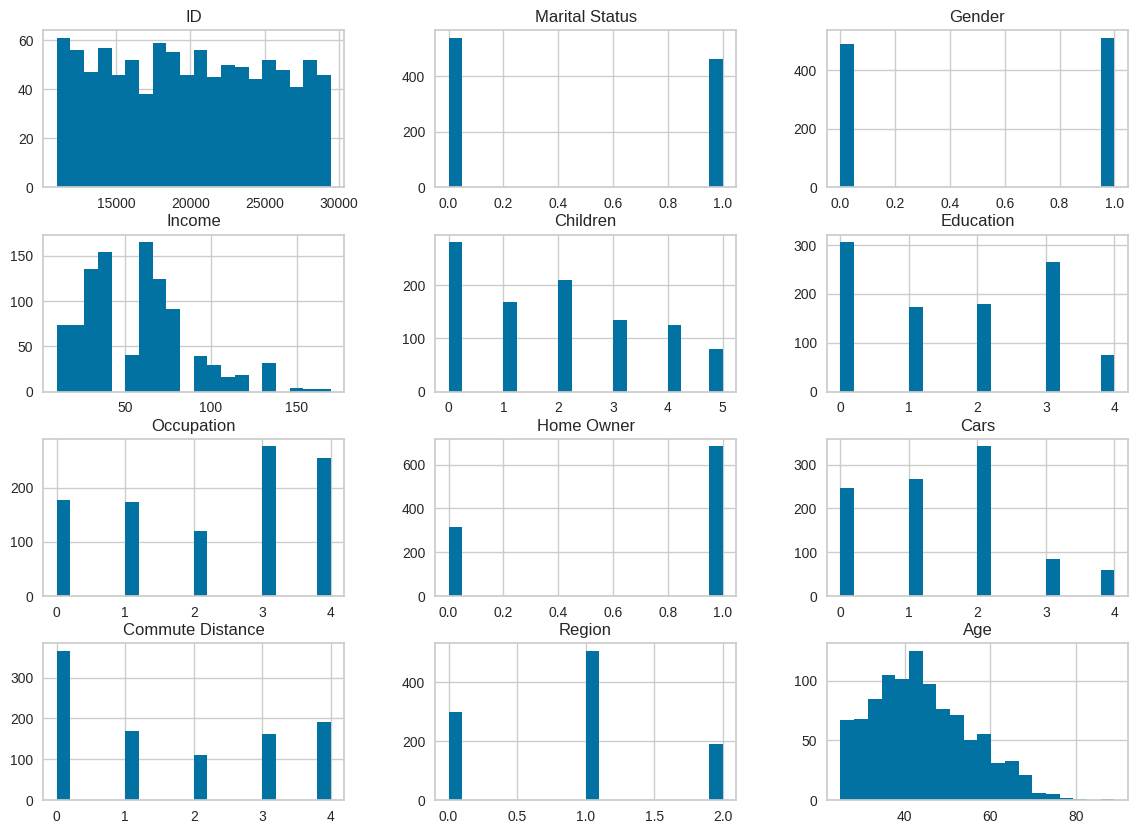

In [25]:
# Histogram untuk melihat distribusi setiap variabel numerik
bike_buyers_ml_df_encoded.hist(figsize=(14, 10), bins=20)
plt.show()

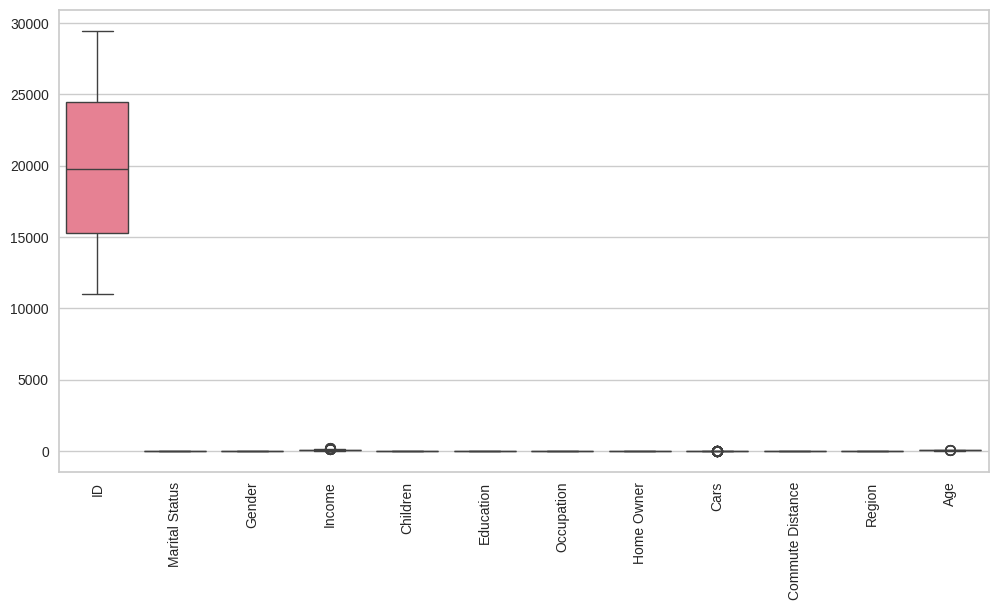

In [26]:
# Boxplot untuk melihat penyebaran data dan outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_buyers_ml_df_encoded)
plt.xticks(rotation=90)  # Rotasi label agar lebih mudah dibaca
plt.show()

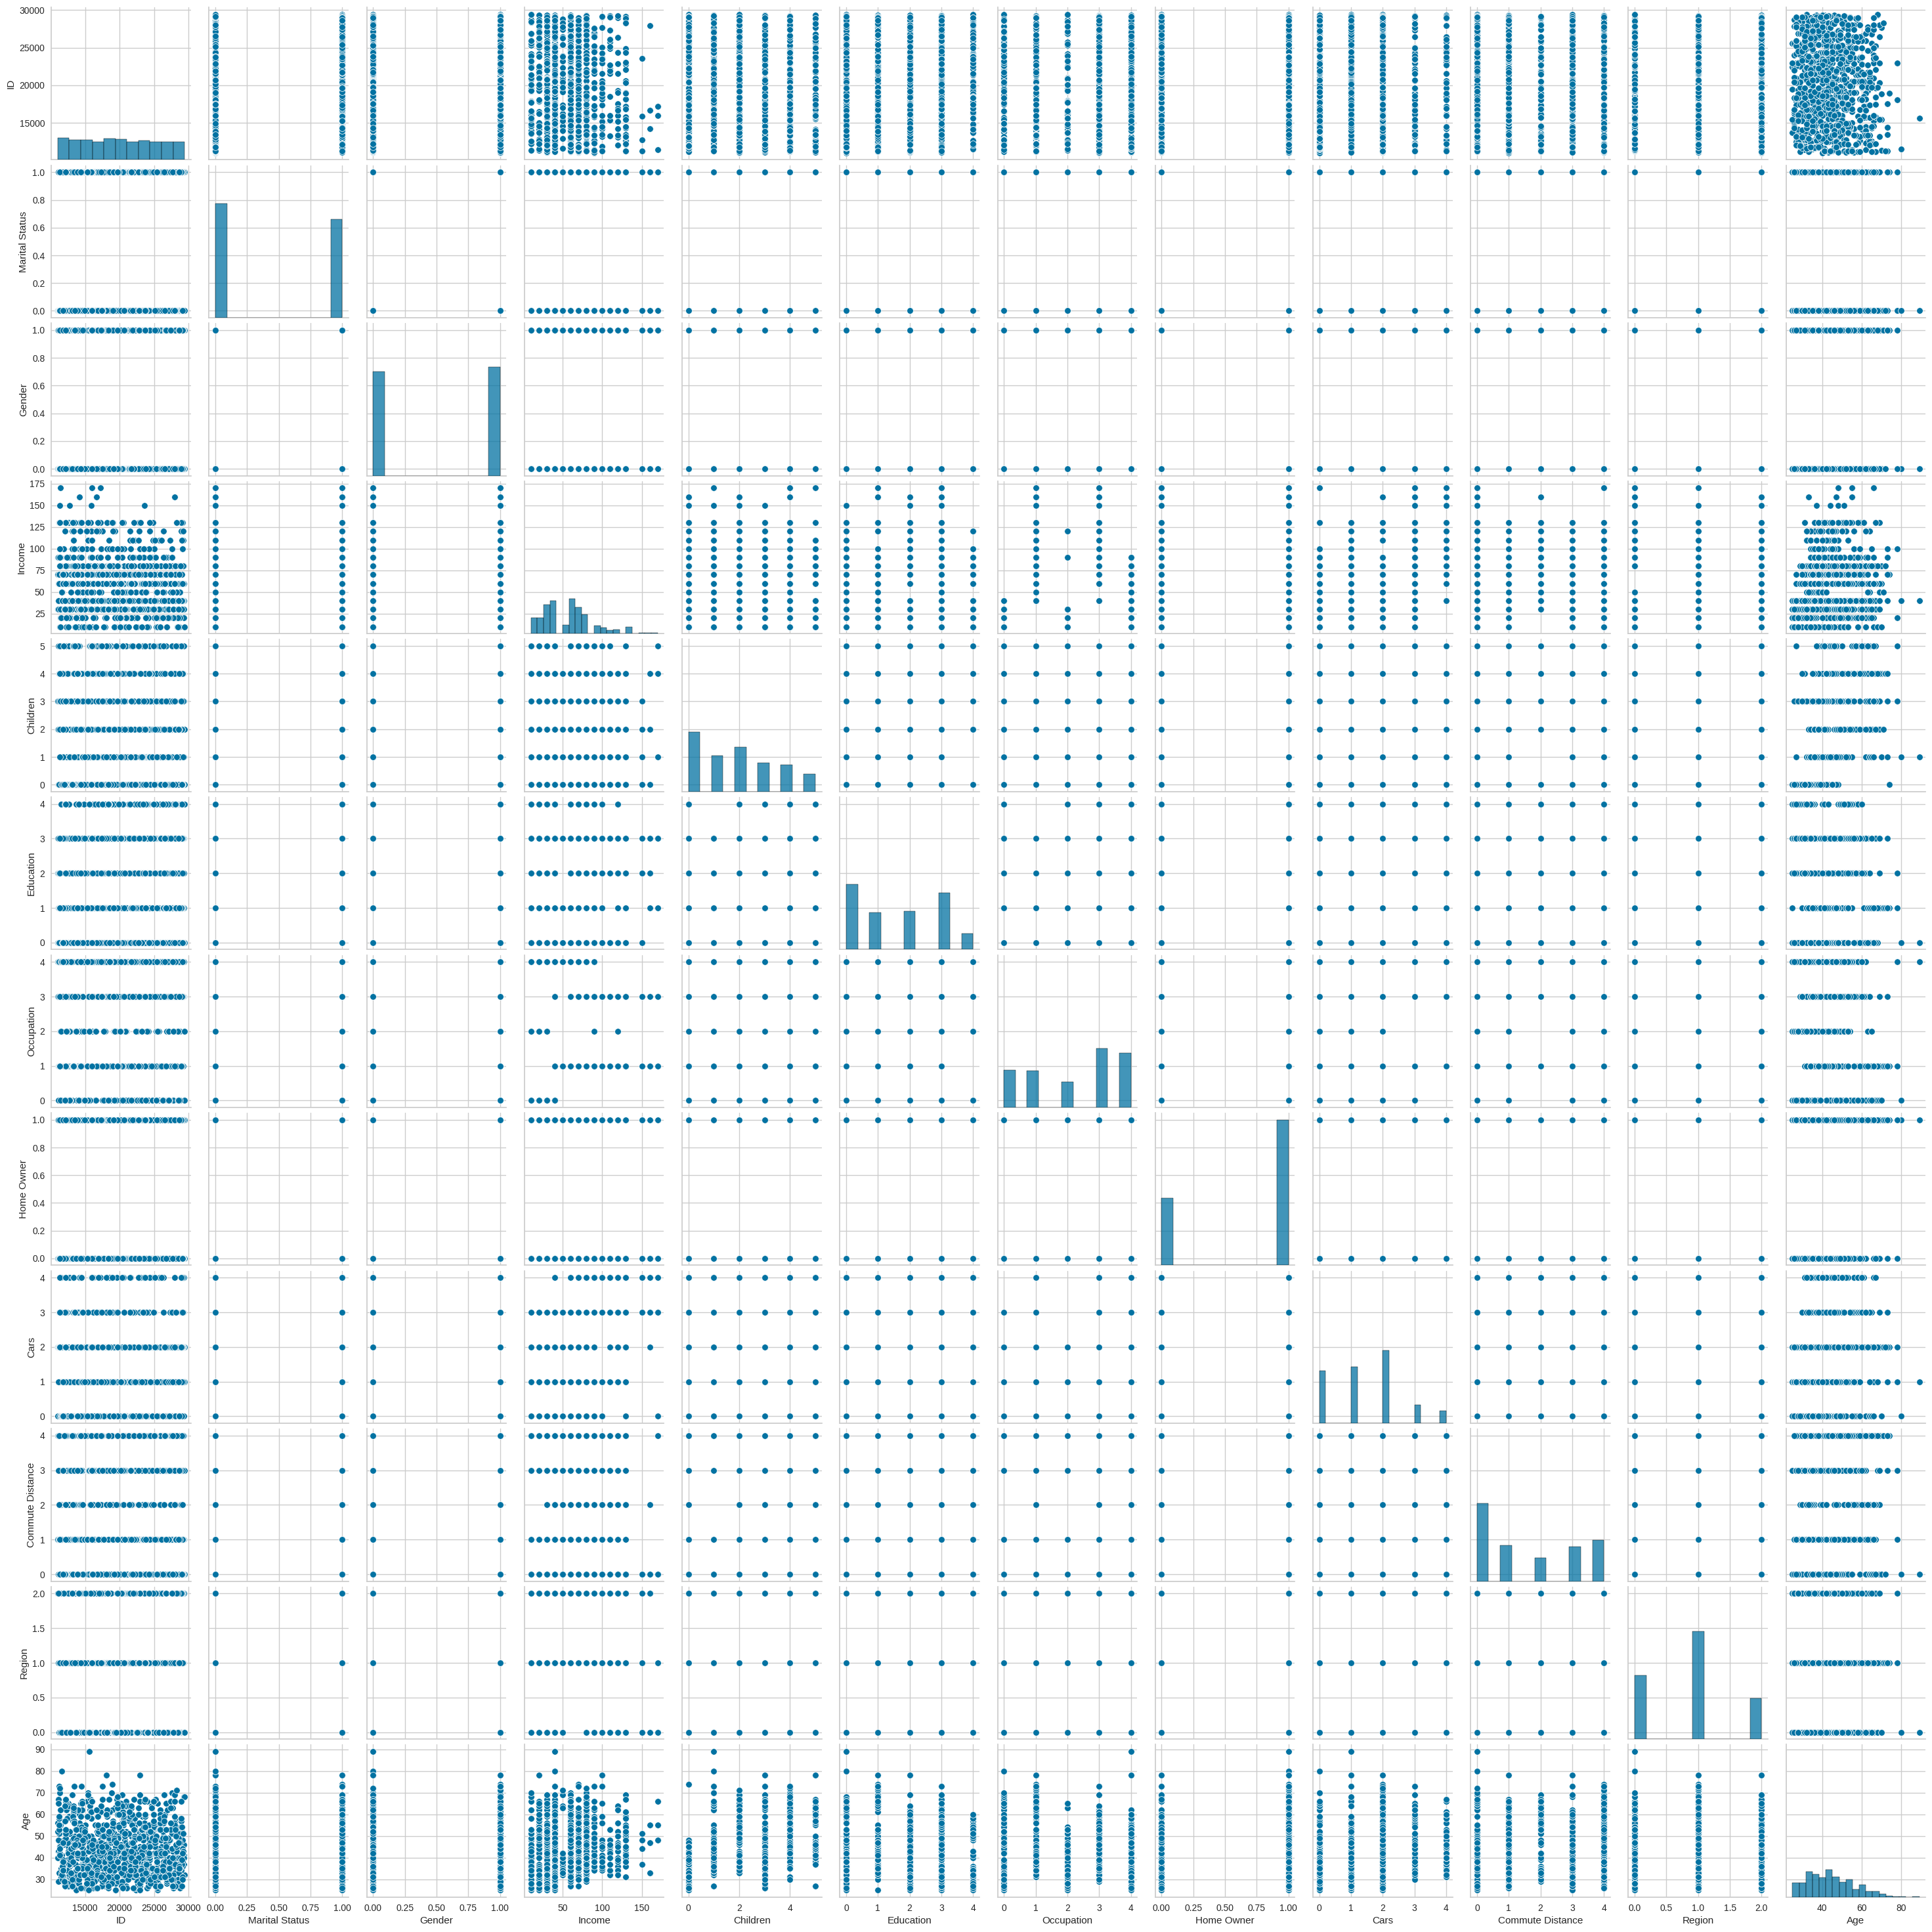

In [27]:
# Pairplot untuk melihat hubungan antar variabel
sns.pairplot(bike_buyers_ml_df_encoded)
plt.show()

In [28]:
%whos

Variable                    Type         Data/Info
--------------------------------------------------
DBSCAN                      type         <class 'sklearn.cluster._dbscan.DBSCAN'>
DecisionTreeClassifier      ABCMeta      <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
IQR                         float64      40.0
KElbowVisualizer            type         <class 'yellowbrick.clust<...>.elbow.KElbowVisualizer'>
KMeans                      ABCMeta      <class 'sklearn.cluster._kmeans.KMeans'>
LabelEncoder                type         <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
LinearRegression            ABCMeta      <class 'sklearn.linear_mo<...>._base.LinearRegression'>
LogisticRegression          type         <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
MinMaxScaler                type         <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
PCA                         ABCMeta      <class 'sklearn.decomposition._pca.PCA'>
Q1                      

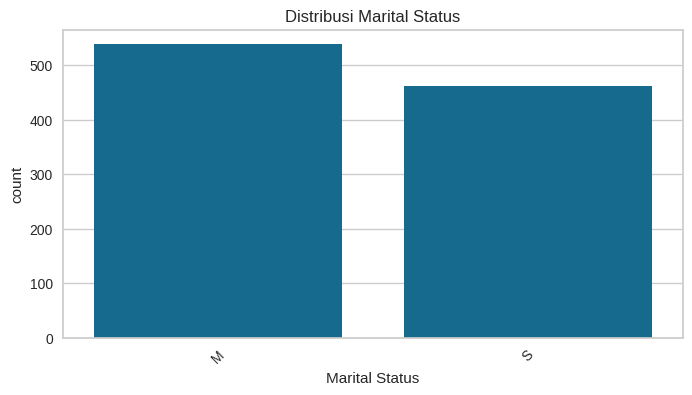

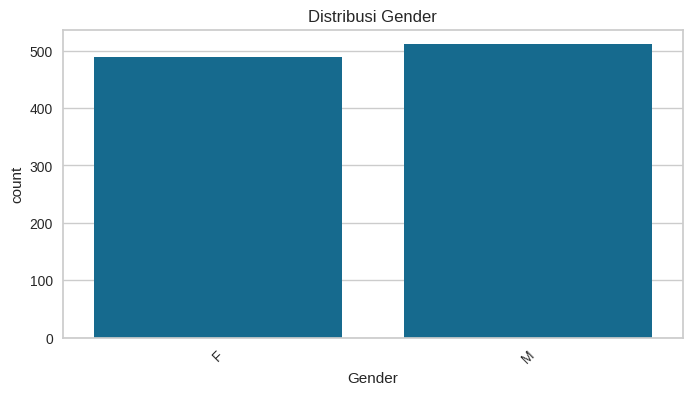

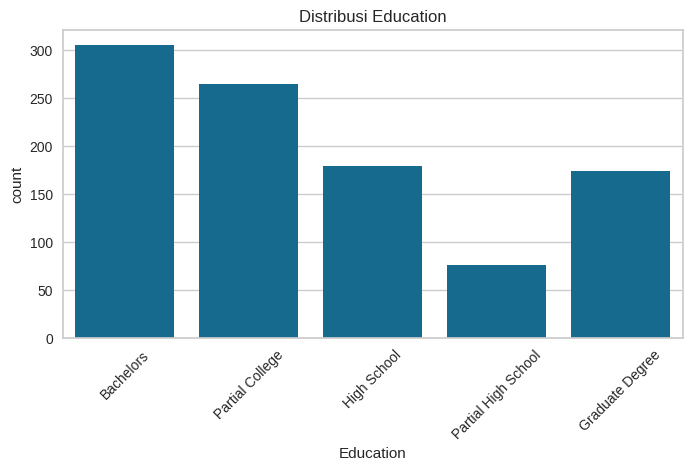

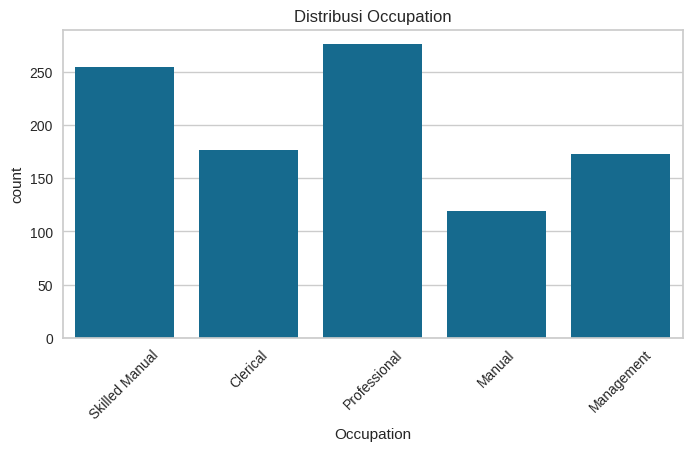

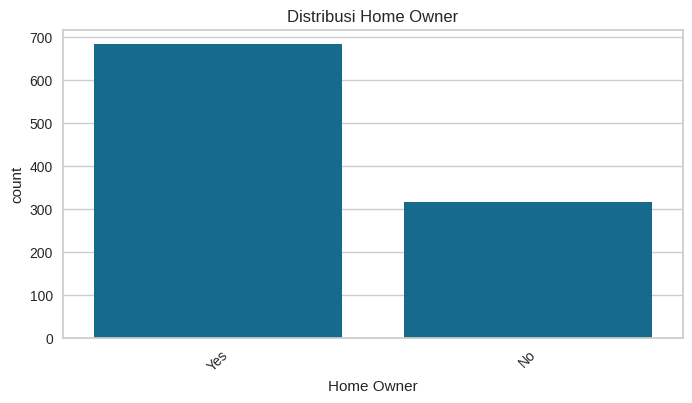

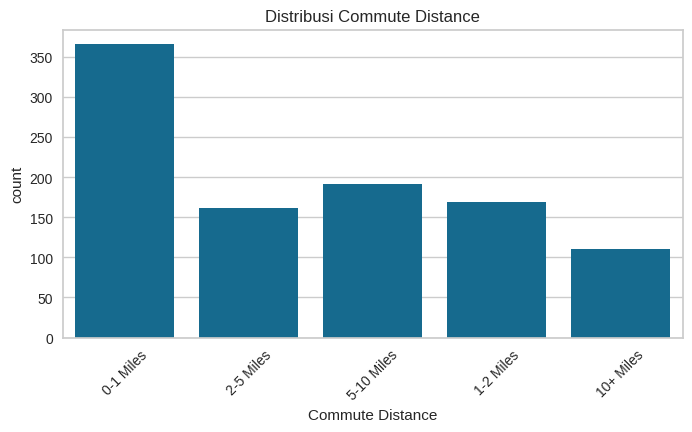

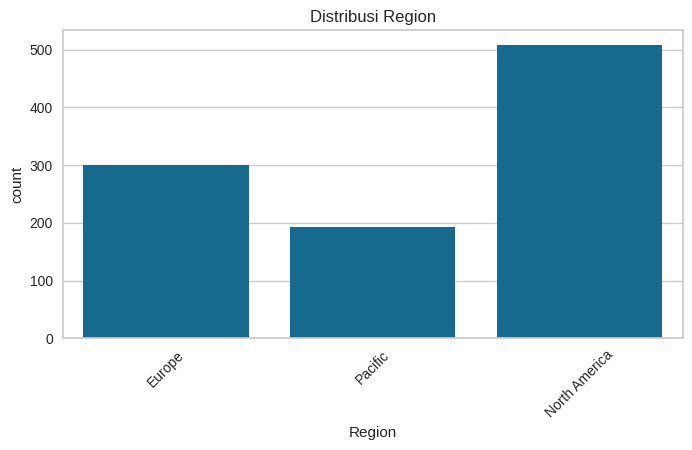

In [29]:
# Visualisasi Distribusi Variabel Kategorikal
categorical_columns = bike_buyers_ml_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=bike_buyers_ml_df[col])
    plt.xticks(rotation=45)
    plt.title(f"Distribusi {col}")
    plt.show()

## Visualisasi Data

In [30]:
# Menampilkan informasi dasar tentang DataFrame, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null di setiap kolom.
print(bike_buyers_ml_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    1000 non-null   object 
 2   Gender            1000 non-null   object 
 3   Income            1000 non-null   float64
 4   Children          1000 non-null   int64  
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        1000 non-null   object 
 8   Cars              1000 non-null   int64  
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               1000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 101.6+ KB
None


In [31]:
# Pastikan variabel kategorikal terdeteksi dengan benar
categorical_cols = bike_buyers_ml_df.select_dtypes(include=['object']).columns
print("Kolom kategorikal:", categorical_cols)

Kolom kategorikal: Index(['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region'],
      dtype='object')


In [32]:
# Hitung jumlah baris dan kolom untuk subplot
num_cols = 3  # Maksimal 3 grafik per baris
num_rows = math.ceil(len(categorical_cols) / num_cols)

<ipython-input-33-e0130daa8c47>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bike_buyers_ml_df[col], palette='viridis', ax=ax)
<ipython-input-33-e0130daa8c47>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bike_buyers_ml_df[col], palette='viridis', ax=ax)
<ipython-input-33-e0130daa8c47>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bike_buyers_ml_df[col], palette='viridis', ax=ax)
<ipython-input-33-e0130daa8c47>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

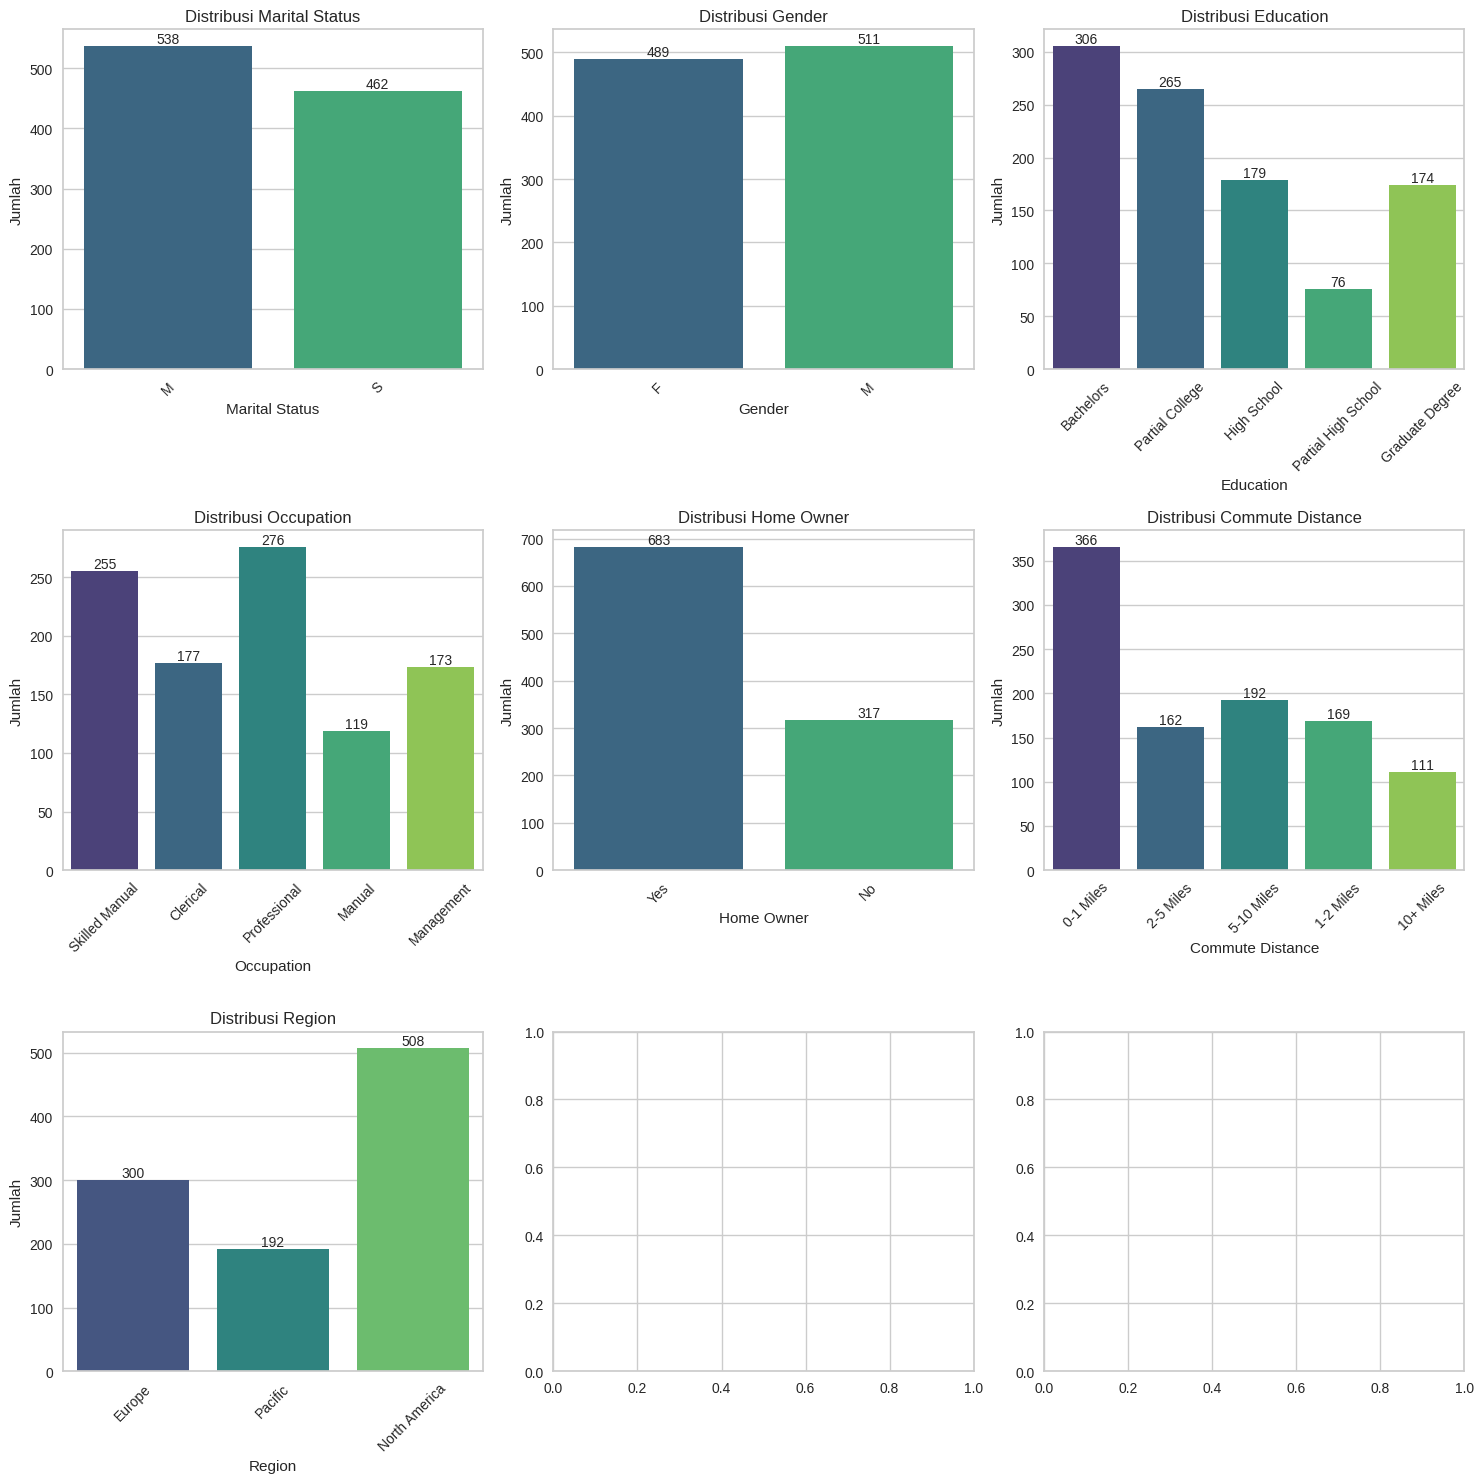

In [33]:
# Hitung jumlah baris dan kolom untuk subplot
num_cols = 3  # Maksimal 3 grafik per baris
num_rows = math.ceil(len(categorical_cols) / num_cols)

# Buat subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

# Rata-rata jika hanya ada satu baris subplot
axes = axes.flatten() if num_rows > 1 else [axes]

# Loop untuk setiap kolom kategorikal dan visualisasikan
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(x=bike_buyers_ml_df[col], palette='viridis', ax=ax)

    # Pengaturan title, label, dan rotasi pada sumbu x
    ax.set_title(f'Distribusi {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Jumlah')
    ax.tick_params(axis='x', rotation=45)

    # Tambahkan label jumlah di atas bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Pastikan layout tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

In [34]:
# Cek jika ada nilai kosong
print(bike_buyers_ml_df[categorical_cols].isnull().sum())

Marital Status      0
Gender              0
Education           0
Occupation          0
Home Owner          0
Commute Distance    0
Region              0
dtype: int64


In [35]:
# Cek kategori unik pada 'Home Owner' dan 'Commute Distance'
for col in ['Home Owner', 'Commute Distance']:
    print(f"{col}: {bike_buyers_ml_df[col].unique()}")

Home Owner: ['Yes' 'No']
Commute Distance: ['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' '10+ Miles']


In [36]:
# Pastikan tidak ada spasi ekstra pada nilai kategorikal
bike_buyers_ml_df['Home Owner'] = bike_buyers_ml_df['Home Owner'].str.strip()
bike_buyers_ml_df['Commute Distance'] = bike_buyers_ml_df['Commute Distance'].str.strip()

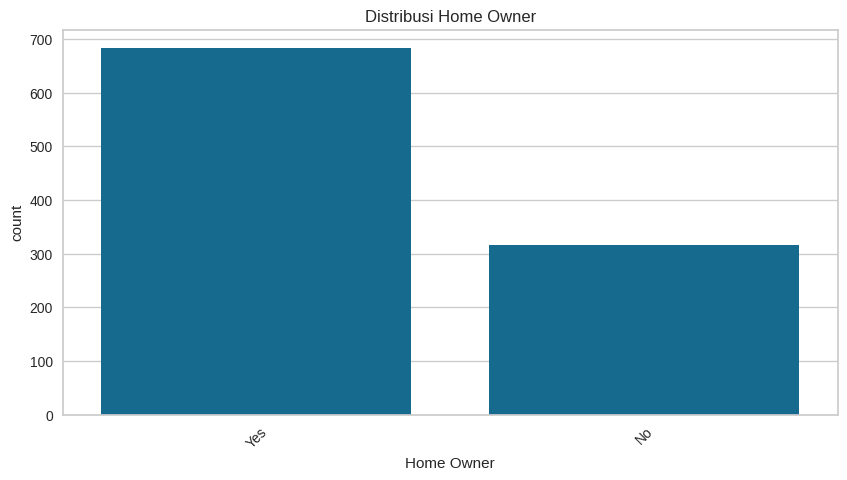

In [37]:
# Visualisasi untuk 'Home Owner'
plt.figure(figsize=(10,5))
sns.countplot(data=bike_buyers_ml_df, x="Home Owner")
plt.xticks(rotation=45)
plt.title("Distribusi Home Owner")
plt.show()

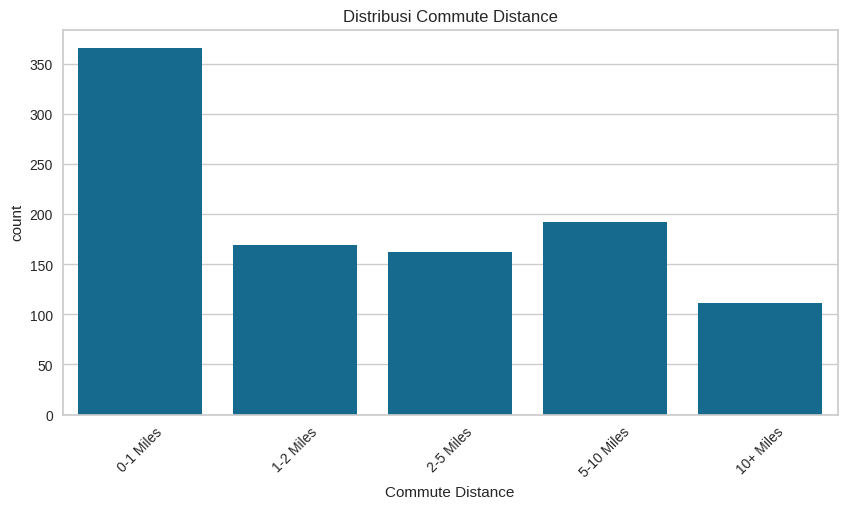

In [38]:
# Visualisasi untuk 'Commute Distance' dengan urutan kategori
plt.figure(figsize=(10,5))
sns.countplot(data=bike_buyers_ml_df, x="Commute Distance",
              order=['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'])
plt.xticks(rotation=45)
plt.title("Distribusi Commute Distance")
plt.show()

In [39]:
# Cek kembali tipe data dan kategori unik 'Commute Distance'
print(bike_buyers_ml_df['Commute Distance'].unique())
print(bike_buyers_ml_df['Commute Distance'].dtype)

['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' '10+ Miles']
object


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 1. Menangani Data Kosong (Missing Values)

In [40]:
# Menghapus atau Menangani Data Kosong (Missing Values)
print(bike_buyers_ml_df.isnull().sum())

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
dtype: int64


## 2. Menghapus Data Duplikat

In [41]:
# Menghapus Data Duplikat
print("Jumlah data duplikat:", bike_buyers_ml_df.duplicated().sum())
bike_buyers_ml_df.drop_duplicates(inplace=True)

Jumlah data duplikat: 0


## 3. Normalisasi atau Standarisasi Fitur

In [42]:
# Normalisasi atau Standarisasi Fitur
scaler = MinMaxScaler()
bike_buyers_ml_df[['Income', 'Age', 'Cars', 'Children']] = scaler.fit_transform(
    bike_buyers_ml_df[['Income', 'Age', 'Cars', 'Children']]
)

## 4. Deteksi dan Penanganan Outlier

In [43]:
def remove_outliers(df, column):
    # Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) dari kolom yang ditentukan
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Menghitung rentang interkuartil (IQR)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas untuk mendeteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengembalikan data yang tidak memiliki outlier berdasarkan batas bawah dan atas
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ['Income', 'Age', 'Cars', 'Children']:
    bike_buyers_ml_df = remove_outliers(bike_buyers_ml_df, col)

## 5. Encoding Data Kategorikal

In [44]:
# Mengonversi variabel kategorikal menjadi variabel numerik menggunakan one-hot encoding
# drop_first=True untuk menghindari multikolinearitas dengan menghapus kolom pertama yang dihasilkan
bike_buyers_ml_df = pd.get_dummies(bike_buyers_ml_df, drop_first=True)

## 6. Binning (Pengelompokan Data)

In [45]:
# Menambahkan Binning untuk Age
bins = [0, 25, 50, 100]
labels = ['Muda', 'Dewasa', 'Lansia']
bike_buyers_ml_df['Age Group'] = pd.cut(bike_buyers_ml_df['Age'], bins=bins, labels=labels)
bike_buyers_ml_df = pd.get_dummies(bike_buyers_ml_df, columns=['Age Group'], drop_first=True)

In [46]:
# Memisahkan kolom yang relevan (numerik dan boolean) untuk clustering
features = bike_buyers_ml_df.drop(columns=['ID'])

In [47]:
# Standarisasi data untuk clustering
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [48]:
# Elbow Method untuk Menentukan Jumlah Cluster Optimal
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

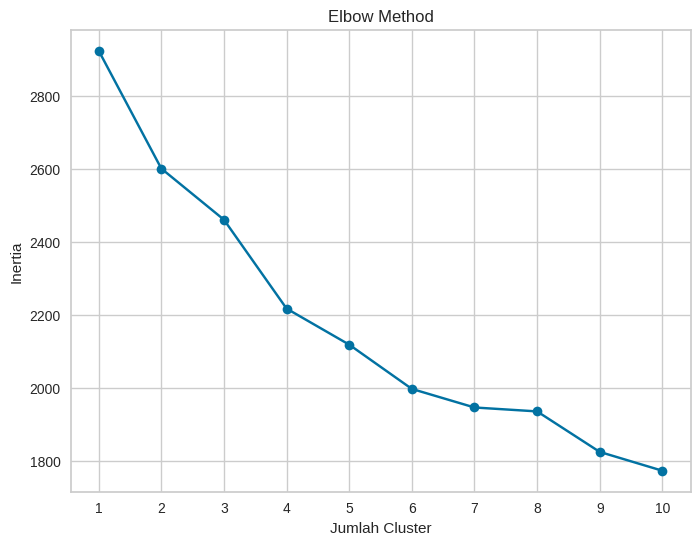

In [49]:
# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [50]:
# Berdasarkan elbow, kita pilih jumlah cluster optimal (misalnya 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
bike_buyers_ml_df['Cluster'] = kmeans.fit_predict(features_scaled)

In [51]:
# Silhouette Score untuk Mengukur Kualitas Cluster
silhouette_avg = silhouette_score(features_scaled, bike_buyers_ml_df['Cluster'])
print(f'Silhouette Score untuk {optimal_k} cluster: {silhouette_avg}')

Silhouette Score untuk 3 cluster: 0.09472671050168996


Visualisasi Hasil Clustering

In [52]:
# Menggunakan PCA untuk mereduksi dimensi menjadi 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

In [53]:
# Menambahkan hasil PCA ke dataframe
bike_buyers_ml_df['PCA1'] = pca_result[:, 0]
bike_buyers_ml_df['PCA2'] = pca_result[:, 1]

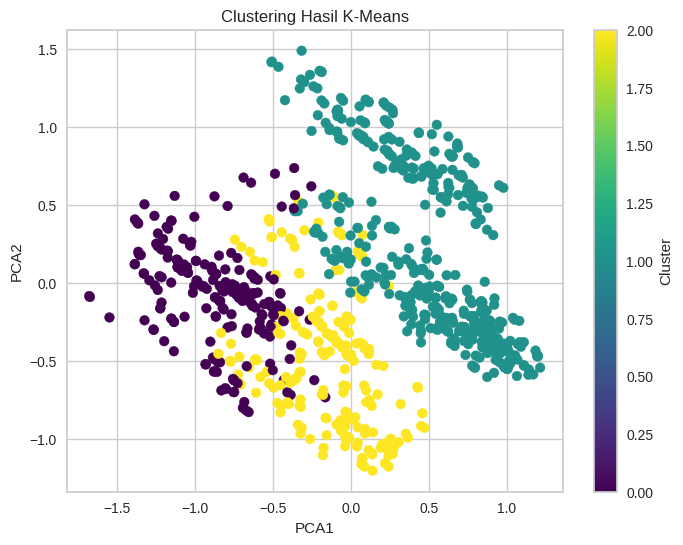

In [54]:
# Plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(bike_buyers_ml_df['PCA1'], bike_buyers_ml_df['PCA2'], c=bike_buyers_ml_df['Cluster'], cmap='viridis')
plt.title('Clustering Hasil K-Means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

##### **Untuk dataset ini, saya memilih karena K-Means Clustering adalah pilihan yang baik, sederhana dan efisien.**

In [55]:
# Menggunakan fitur numerik dari dataset
features = bike_buyers_ml_df[['Income', 'Age', 'Cars', 'Children']]

In [56]:
# Mencari nilai inertia untuk berbagai K (Metode Elbow)
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

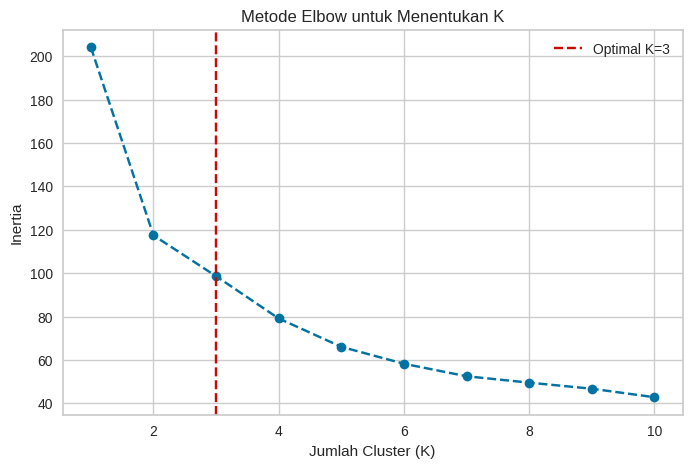

In [57]:
# Plot Metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K')
# Menambahkan garis vertikal untuk K optimal
optimal_k = 3  # Berdasarkan hasil Elbow Method
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K={optimal_k}')
plt.legend()
plt.show()

In [58]:
# Melatih Model K-Means dengan Jumlah Cluster Optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
bike_buyers_ml_df['Cluster'] = kmeans.fit_predict(features)

In [59]:
# Melihat Hasil Clustering
print(bike_buyers_ml_df[['Income', 'Age', 'Cars', 'Children', 'Cluster']].head())

   Income       Age  Cars  Children  Cluster
0  0.1875  0.265625  0.00       0.2        0
1  0.1250  0.281250  0.25       0.6        1
2  0.4375  0.546875  0.50       1.0        2
3  0.3750  0.250000  0.25       0.0        0
4  0.1250  0.171875  0.00       0.0        0


In [60]:
# Mengurangi Dimensi Menjadi 2 dengan PCA untuk Visualisasi
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

In [61]:
# Membuat DataFrame hasil PCA
bike_buyers_ml_df['PCA1'] = reduced_features[:, 0]
bike_buyers_ml_df['PCA2'] = reduced_features[:, 1]

In [62]:
# Menambahkan Hasil PCA ke DataFrame
bike_buyers_ml_df['PCA1'] = reduced_features[:, 0]
bike_buyers_ml_df['PCA2'] = reduced_features[:, 1]

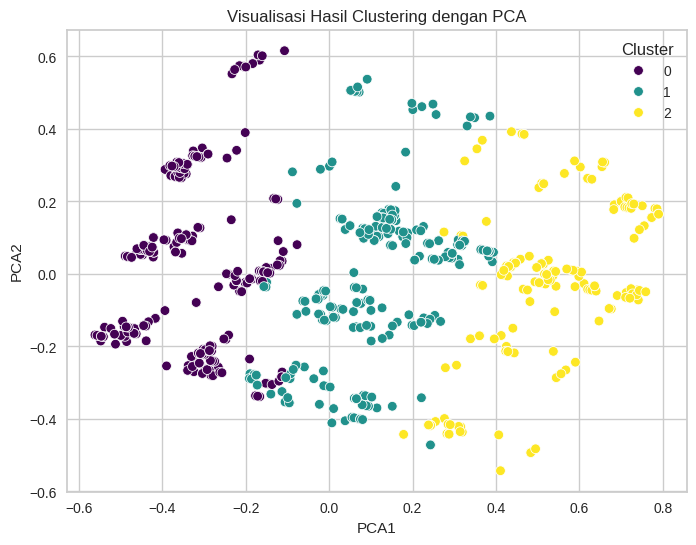

In [63]:
# Visualisasi Hasil Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=bike_buyers_ml_df)
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [64]:
# Mencari nilai inertia untuk berbagai K (Metode Elbow)
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

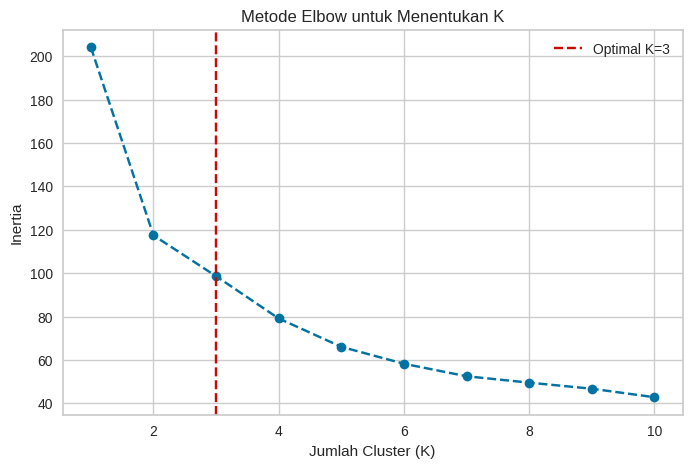

In [65]:
# Plot Metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K')
# Menambahkan garis vertikal untuk K optimal
optimal_k_elbow = 3  # Berdasarkan hasil Elbow Method
plt.axvline(x=optimal_k_elbow, color='r', linestyle='--', label=f'Optimal K={optimal_k_elbow}')
plt.legend()
plt.show()

In [66]:
# Silhouette Score untuk Menilai Kualitas Cluster
silhouette_scores = []
for k in K_range[1:]:  # Mulai dari k=2 karena silhouette score tidak terdefinisi untuk k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_scores.append(score)

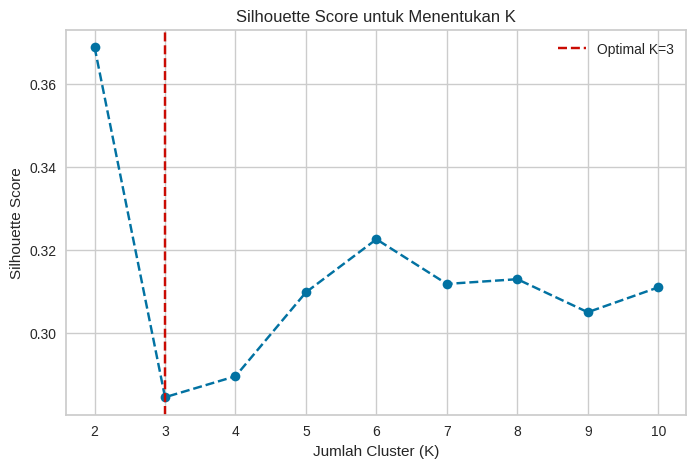

In [67]:
# Plot Silhouette Score untuk Berbagai K
plt.figure(figsize=(8, 5))
plt.plot(K_range[1:], silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan K')
plt.axvline(x=optimal_k_elbow, color='r', linestyle='--', label=f'Optimal K={optimal_k_elbow}')
plt.legend()
plt.show()

In [68]:
# Tentukan K dengan Silhouette Score Optimal (K dengan nilai Silhouette Score tertinggi)
optimal_k_silhouette = K_range[1:][np.argmax(silhouette_scores)]
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_k_silhouette}")

Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [69]:
# Melatih Model K-Means dengan Jumlah Cluster Optimal Berdasarkan Silhouette Score
kmeans = KMeans(n_clusters=optimal_k_silhouette, random_state=42)
bike_buyers_ml_df['Cluster'] = kmeans.fit_predict(features)

In [70]:
# Melihat Hasil Clustering dengan Silhouette Score Optimal
print(bike_buyers_ml_df[['Income', 'Age', 'Cars', 'Children', 'Cluster']].head())

   Income       Age  Cars  Children  Cluster
0  0.1875  0.265625  0.00       0.2        0
1  0.1250  0.281250  0.25       0.6        1
2  0.4375  0.546875  0.50       1.0        1
3  0.3750  0.250000  0.25       0.0        0
4  0.1250  0.171875  0.00       0.0        0


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [71]:
# Menghitung korelasi antar fitur numerik
correlation_matrix = bike_buyers_ml_df[['Income', 'Age', 'Cars', 'Children']].corr()

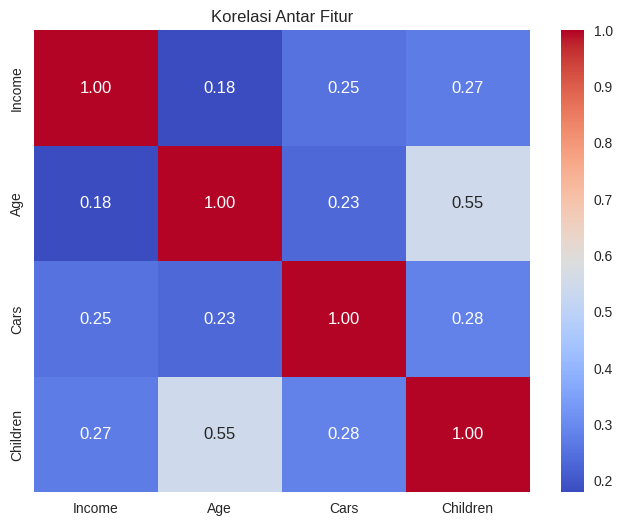

In [72]:
# Menampilkan heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Antar Fitur")
plt.show()

In [73]:
# Menghapus Fitur dengan Korelasi Tinggi (>0.9)
# Misalnya, kita ingin menghapus fitur yang memiliki korelasi lebih besar dari 0.9
# Menyaring fitur dengan korelasi tinggi
threshold = 0.9
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [74]:
# Menghapus fitur yang memiliki korelasi tinggi
features_selected = bike_buyers_ml_df[['Income', 'Age', 'Cars', 'Children']].drop(columns=correlated_features)

In [75]:
# Evaluasi Model Clustering Sebelum dan Setelah Feature Selection
# Melatih model K-Means Clustering dengan semua fitur
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [76]:
# Fitur yang sudah dipilih (sebelum feature selection)
features = bike_buyers_ml_df[['Income', 'Age', 'Cars', 'Children']]

In [77]:
# Menentukan jumlah cluster dengan metode Elbow
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

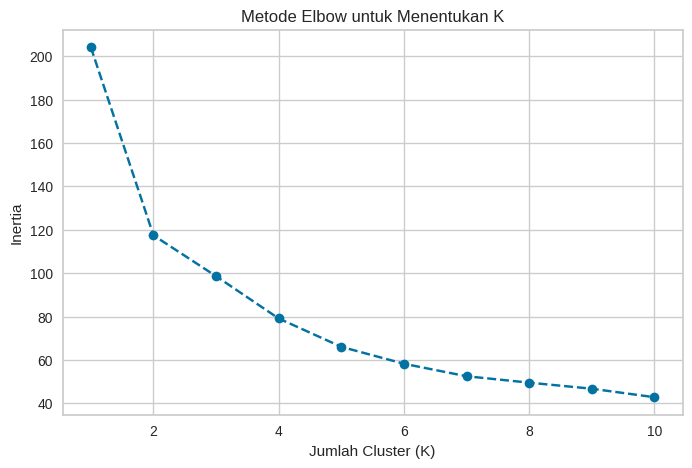

In [78]:
# Plot metode elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K')
plt.show()

In [79]:
# Menentukan K yang optimal dari hasil elbow method
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
bike_buyers_ml_df['Cluster_All_Features'] = kmeans.fit_predict(features)

In [80]:
# Menghitung Silhouette Score untuk model dengan semua fitur
sil_score_all_features = silhouette_score(features, bike_buyers_ml_df['Cluster_All_Features'])
print("Silhouette Score (Semua Fitur):", sil_score_all_features)

Silhouette Score (Semua Fitur): 0.28444680721145854


In [81]:
# Melatih model K-Means dengan fitur terpilih
kmeans_selected = KMeans(n_clusters=optimal_k, random_state=42)
bike_buyers_ml_df['Cluster_Selected_Features'] = kmeans_selected.fit_predict(features_selected)

In [82]:
# Menghitung Silhouette Score untuk model dengan fitur terpilih
sil_score_selected_features = silhouette_score(features_selected, bike_buyers_ml_df['Cluster_Selected_Features'])
print("Silhouette Score (Fitur Terpilih):", sil_score_selected_features)

Silhouette Score (Fitur Terpilih): 0.28444680721145854


In [83]:
# Perbandingan antara hasil clustering dengan semua fitur dan fitur terpilih
print("\nHasil Clustering dengan Semua Fitur:")
print(bike_buyers_ml_df[['Income', 'Age', 'Cars', 'Children', 'Cluster_All_Features']].head())
print("\nHasil Clustering dengan Fitur Terpilih:")
print(bike_buyers_ml_df[['Income', 'Age', 'Cars', 'Children', 'Cluster_Selected_Features']].head())


Hasil Clustering dengan Semua Fitur:
   Income       Age  Cars  Children  Cluster_All_Features
0  0.1875  0.265625  0.00       0.2                     0
1  0.1250  0.281250  0.25       0.6                     1
2  0.4375  0.546875  0.50       1.0                     2
3  0.3750  0.250000  0.25       0.0                     0
4  0.1250  0.171875  0.00       0.0                     0

Hasil Clustering dengan Fitur Terpilih:
   Income       Age  Cars  Children  Cluster_Selected_Features
0  0.1875  0.265625  0.00       0.2                          0
1  0.1250  0.281250  0.25       0.6                          1
2  0.4375  0.546875  0.50       1.0                          2
3  0.3750  0.250000  0.25       0.0                          0
4  0.1250  0.171875  0.00       0.0                          0


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [84]:
# Reduksi dimensi menjadi 2 menggunakan PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

In [85]:
# Menambahkan hasil PCA ke dalam DataFrame untuk visualisasi
bike_buyers_ml_df['PCA1'] = reduced_features[:, 0]
bike_buyers_ml_df['PCA2'] = reduced_features[:, 1]

In [86]:
# Pastikan kolom 'Cluster_Selected_Features' adalah tipe kategori
bike_buyers_ml_df['Cluster_Selected_Features'] = bike_buyers_ml_df['Cluster_Selected_Features'].astype('category')

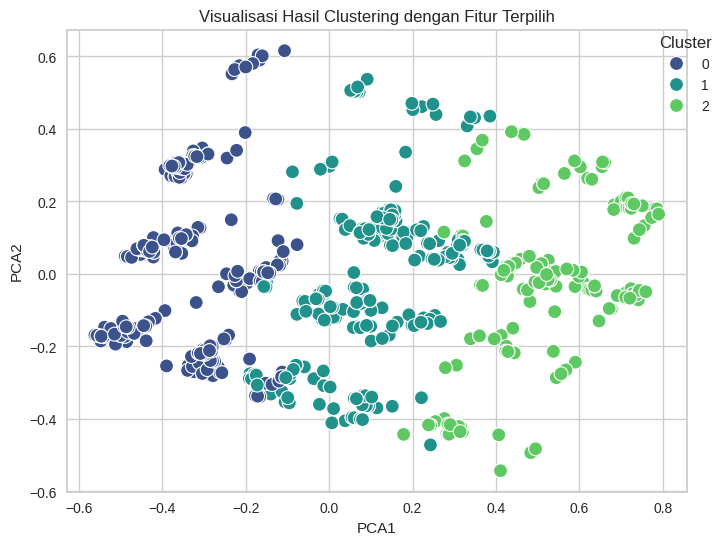

In [87]:
# Visualisasi hasil clustering dengan scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Selected_Features', palette='viridis', data=bike_buyers_ml_df, s=100, marker='o')

# Menambahkan label dan judul
plt.title("Visualisasi Hasil Clustering dengan Fitur Terpilih")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

# Menampilkan legend dengan parameter `bbox_to_anchor` agar posisinya lebih baik
plt.legend(title='Cluster', loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Menampilkan plot
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [88]:
# Menampilkan beberapa baris pertama untuk memastikan dataset dimuat dengan benar
print(bike_buyers_ml_df.head())

      ID  Income  Children  Cars       Age  Marital Status_S  Gender_M  \
0  12496  0.1875       0.2  0.00  0.265625             False     False   
1  24107  0.1250       0.6  0.25  0.281250             False      True   
2  14177  0.4375       1.0  0.50  0.546875             False      True   
3  24381  0.3750       0.0  0.25  0.250000              True      True   
4  25597  0.1250       0.0  0.00  0.171875              True      True   

   Education_Graduate Degree  Education_High School  \
0                      False                  False   
1                      False                  False   
2                      False                  False   
3                      False                  False   
4                      False                  False   

   Education_Partial College  ...  Commute Distance_5-10 Miles  \
0                      False  ...                        False   
1                       True  ...                        False   
2                       Tr

In [89]:
# Menambahkan hasil label cluster ke DataFrame setelah clustering
bike_buyers_ml_df['Cluster'] = kmeans.labels_

In [92]:
# Misalkan 'Gender_M' adalah hasil label encoding dan kita ingin mengembalikannya ke kategori aslinya
label_encoder = LabelEncoder()

# Fit label_encoder pada data yang relevan (misalnya Gender asli: "Male", "Female")
# Di sini, kita fit label_encoder dengan data kategorikal asli ("Male", "Female")
label_encoder.fit(['Male', 'Female'])

# Ganti df_normalized dengan bike_buyers_ml_df_encoded, it's likely the original dataframe bike_buyers_ml_df is required
#bike_buyers_ml_df_encoded['Gender'] = label_encoder.inverse_transform(bike_buyers_ml_df_encoded['Gender_M'])
bike_buyers_ml_df['Gender'] = label_encoder.inverse_transform(bike_buyers_ml_df['Gender_M']) # Change to correct dataframe

# Masukkan data yang sudah di-inverse ke dalam dataset asli, ganti df_normalized dengan bike_buyers_ml_df_encoded
# dan df_original dengan bike_buyers_ml_df
#bike_buyers_ml_df = bike_buyers_ml_df_encoded.copy()

# Tampilkan beberapa baris pertama untuk memastikan perubahan telah dilakukan
print(bike_buyers_ml_df[['Gender_M', 'Gender']].head())

   Gender_M  Gender
0     False  Female
1      True    Male
2      True    Male
3      True    Male
4      True    Male


In [93]:
# Misalnya, fitur yang telah distandarisasi adalah 'Income', 'Children', 'Cars', 'Age'
scaler = StandardScaler()

# Fit scaler pada data yang digunakan untuk standarisasi (data yang sudah diproses sebelumnya)
scaler.fit(bike_buyers_ml_df[['Income', 'Children', 'Cars', 'Age']])

StandardScaler()

In [94]:
# Melakukan inverse transform pada fitur yang telah distandarisasi
features_original = scaler.inverse_transform(bike_buyers_ml_df[['Income', 'Children', 'Cars', 'Age']])

# Menyimpan hasil inverse transform ke dalam DataFrame
bike_buyers_ml_df[['Income', 'Children', 'Cars', 'Age']] = features_original

In [95]:
# Menghitung rata-rata untuk setiap cluster
cluster_summary = bike_buyers_ml_df.groupby('Cluster')[['Income', 'Children', 'Cars', 'Age']].mean()

# Menampilkan summary
print(cluster_summary)

           Income  Children      Cars       Age
Cluster                                        
0        0.303295  0.395819  0.374367  0.324610
1        0.307641  0.515429  0.400771  0.365369
2        0.328671  0.647108  0.426661  0.365240


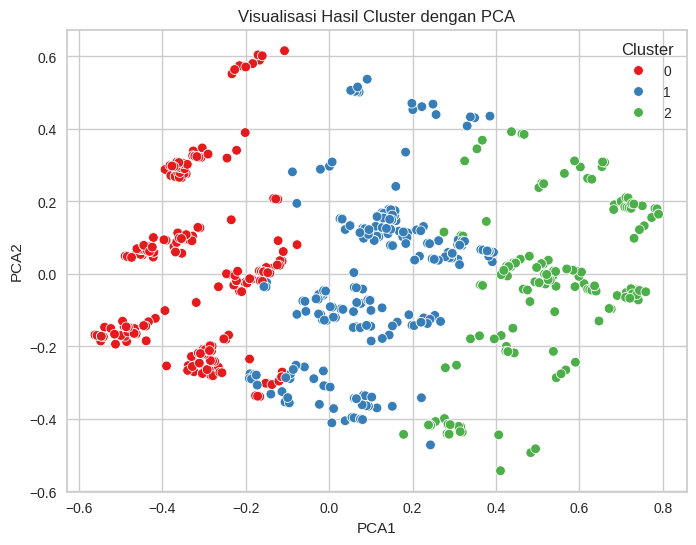

In [96]:
# Visualisasi hasil clustering berdasarkan PCA (jika ada PCA)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=bike_buyers_ml_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('Visualisasi Hasil Cluster dengan PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

### Hasil Interpretasinya

#### **1. Cluster 1:**
* **Pendapatan (Income):**  Pendapatan di cluster ini cenderung lebih rendah dibandingkan cluster lainnya.

* **Jumlah Anak (Children):** Cluster ini memiliki jumlah anak yang sedikit lebih banyak daripada cluster lainnya.

* **Jumlah Mobil (Cars):** Anggota cluster ini memiliki jumlah mobil yang lebih sedikit dibandingkan dengan cluster lain.

* **Usia (Age):** Anggota cluster ini umumnya lebih muda, mungkin masih dalam tahap awal membangun keluarga atau karier.

####**Interpretasi Cluster 1:**

* **Ekspektasi dan Logika Bisnis:** Cluster ini kemungkinan besar terdiri dari individu yang baru memulai karier atau keluarga. Pendapatan yang lebih rendah menunjukkan bahwa mereka masih dalam tahap membangun stabilitas finansial.

* **Pola yang Bisa Dimanfaatkan:** Untuk cluster ini, produk yang lebih terjangkau dan fokus pada perencanaan keluarga atau keuangan bisa sangat relevan. Misalnya, mereka mungkin tertarik pada layanan yang membantu mereka mengelola pengeluaran atau kebutuhan keluarga dengan biaya lebih rendah.




#### **Cluster 2:**
* **Pendapatan (Income):** Pendapatan di cluster ini sedikit lebih tinggi dibandingkan dengan cluster 1, tetapi tidak setinggi cluster 3.

* **Jumlah Anak (Children):** Jumlah anak di cluster ini cenderung lebih banyak dibandingkan cluster lainnya.

* **Jumlah Mobil (Cars):** Cluster ini memiliki jumlah mobil yang sedikit lebih banyak dibandingkan cluster 1, tapi tidak sebanyak cluster 3.

* **Usia (Age):** Anggota cluster ini lebih muda, biasanya mereka sedang berada dalam fase kehidupan yang aktif, membangun keluarga dan karier.

#### **Interpretasi Cluster 2:**

* **Ekspektasi dan Logika Bisnis:** Ini bisa menggambarkan keluarga muda dengan pendapatan menengah yang sedang berkembang, baik dari segi finansial maupun dalam hal kehidupan keluarga.

* **Pola yang Bisa Dimanfaatkan:** Produk atau layanan yang bisa membantu mereka menyeimbangkan pekerjaan dan keluarga akan menarik bagi cluster ini. Misalnya, layanan yang mendukung kebutuhan keluarga, seperti asuransi keluarga atau produk yang membuat kehidupan sehari-hari lebih praktis.

#### **Cluster 3:**
* **Pendapatan (Income):** Pendapatan di cluster ini lebih tinggi dibandingkan dengan cluster lainnya.

* **Jumlah Anak (Children):** Jumlah anak di cluster ini sedang, tidak terlalu banyak atau sedikit.

* **Jumlah Mobil (Cars):** Cluster ini memiliki jumlah mobil yang lebih banyak daripada cluster lainnya.

* **Usia (Age):** Anggota cluster ini lebih tua, menunjukkan bahwa mereka sudah lebih mapan baik dalam kehidupan keluarga maupun karier.

#### **Interpretasi Cluster 3:**

* **Ekspektasi dan Logika Bisnis:** Cluster ini kemungkinan besar terdiri dari individu yang lebih mapan secara finansial dan sudah memiliki pengalaman lebih dalam kehidupan profesional maupun keluarga.

* **Pola yang Bisa Dimanfaatkan:** Produk premium atau layanan yang berfokus pada kualitas hidup lebih tinggi, seperti asuransi pensiun atau produk investasi, akan sangat relevan bagi cluster ini. Mereka juga mungkin lebih tertarik pada kenyamanan dan produk yang menawarkan pengalaman lebih mewah.


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

#### **Analisis Karakteristik Cluster dari Model KMeans**

*Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans pada dataset "Bike Buyers":*


**Cluster 1:**
* Pendapatan (Income): 0.57
* Jumlah Anak (Children): 0.55
* Jumlah Mobil (Cars): 0.68
* Usia (Age): 0.58

**Analisis:**
Cluster ini terdiri dari pelanggan dengan pendapatan yang cukup, tapi tidak terlalu tinggi. Mereka juga masih relatif muda dan memiliki sedikit anak. Mereka lebih cenderung memiliki lebih banyak mobil daripada cluster lainnya, mungkin karena mereka masih dalam fase aktif bekerja atau berkeluarga muda. Pelanggan dalam cluster ini mungkin lebih sensitif terhadap harga dan cenderung mencari produk atau layanan yang sesuai dengan kebutuhan keluarga muda, seperti produk yang terjangkau atau layanan yang membantu perencanaan keuangan dan keluarga.

**Cluster 2:**
* Pendapatan (Income): 0.47
* Jumlah Anak (Children): 0.53
* Jumlah Mobil (Cars): 0.51
* Usia (Age): 0.55

**Analisis:**
Cluster ini menunjukkan pelanggan dengan pendapatan yang sedikit lebih rendah dibandingkan dengan cluster lainnya, namun mereka cenderung memiliki keluarga dengan jumlah anak yang lebih banyak. Usia mereka juga cukup beragam. Pengeluaran mereka lebih moderat dan memiliki jumlah mobil yang standar. Mereka mungkin lebih mengutamakan kebutuhan keluarga dan kesejahteraan anak-anak. Pelanggan dalam cluster ini lebih mencari produk yang bisa mendukung kehidupan keluarga, seperti produk dengan harga terjangkau namun tetap bermanfaat.

**Cluster 3:**
* Pendapatan (Income): 0.47
* Jumlah Anak (Children): 0.55
* Jumlah Mobil (Cars): 0.63
* Usia (Age): 0.70

**Analisis:**
Cluster ini terdiri dari individu yang lebih tua dan lebih mapan dalam hal karier serta kehidupan keluarga. Mereka memiliki jumlah anak yang lebih banyak dan lebih cenderung memiliki mobil lebih dari satu. Pendapatan mereka moderat, namun mereka lebih cenderung untuk memprioritaskan kenyamanan dalam kehidupan sehari-hari. Cluster ini bisa terdiri dari keluarga yang sudah mapan, dengan lebih banyak waktu untuk merencanakan kehidupan jangka panjang. Produk atau layanan yang menawarkan kenyamanan, seperti kendaraan atau layanan keluarga premium, akan lebih menarik bagi mereka.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [97]:
# Mengekspor Data ke dalam file CSV
bike_buyers_ml_df.to_csv('bike_buyers_processed.csv', index=False)